In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import glob, os
import matplotlib.pyplot as plt

In [2]:
cd = os.getcwd()
log_directory = os.path.join(os.sep.join(cd.split(os.path.sep)[:-1]), 'output', 'logs')
log_files = glob.glob(os.path.join(log_directory, "*.csv"))

In [3]:
log_files = glob.glob(os.path.join(log_directory, "*.csv"))
df = pd.concat(pd.read_csv(file, sep = ';') for file in log_files)
# Filter out all apps except for narrow_transformations app
df = df.loc[df['App Name'].str.contains('app_narrow_transf_')]
df_app_ids = pd.DataFrame(df.drop_duplicates('App ID').reset_index (drop = True)[['App ID', 'App Name']])

In [4]:
group_by = df.loc[(df['Name'] == 'APPLICATION START') | (df['Name'] == 'APPLICATION END')].groupby('App ID')
execution_times = pd.DataFrame(group_by.agg({'Datetime': lambda x: list(x)})).reset_index(drop=False)
execution_times['Start'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['End'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['Total app execution time (s)'] = (execution_times['End'] - execution_times['Start']).apply(lambda x: x.total_seconds())
execution_times = execution_times[['App ID', 'Total app execution time (s)']]
execution_times = pd.merge(df_app_ids, execution_times).rename(columns = {'Datetime': 'Total app execution time (s)'})

In [5]:
execution_times['Size percentage'] = execution_times['App Name'].map(lambda x: int(x.split('_')[-2]))
execution_times['Transformation'] = execution_times['App Name'].map(lambda x: x.split('_')[0])

### 1. Transformation = map / filter

In [6]:
map_execution_times = execution_times.loc[execution_times['Transformation'] == 'map']
filter_execution_times = execution_times.loc[execution_times['Transformation'] == 'filter']
union_execution_times = execution_times.loc[execution_times['Transformation'] == 'union']
groupbykey_execution_times = execution_times.loc[execution_times['Transformation'] == 'groupByKey']
reducebykey_execution_times = execution_times.loc[execution_times['Transformation'] == 'reduceByKey']
distinct_execution_times = execution_times.loc[execution_times['Transformation'] == 'distinct']

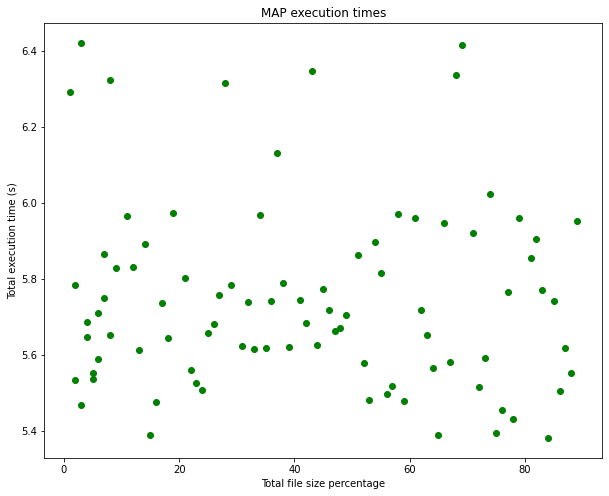

In [7]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = map_execution_times['Size percentage']
# corresponding y axis values
y = map_execution_times['Total app execution time (s)']
np_map = y.to_numpy()

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'green')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('MAP execution times')

# function to show the plot
plt.show()


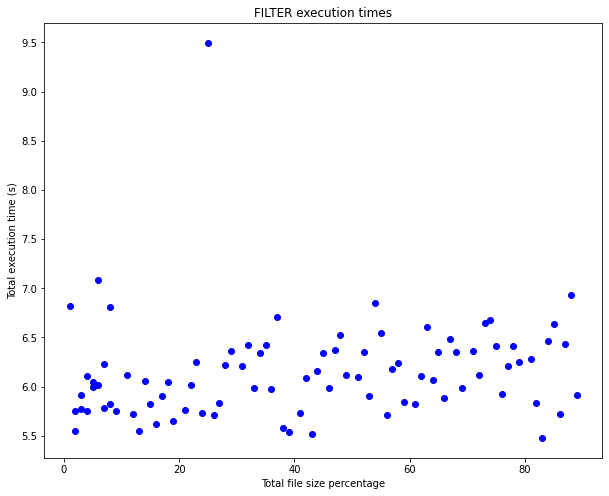

In [8]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = filter_execution_times['Size percentage']
# corresponding y axis values
y = filter_execution_times['Total app execution time (s)']
np_filter = y.to_numpy()

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'blue')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('FILTER execution times')

# function to show the plot
plt.show()


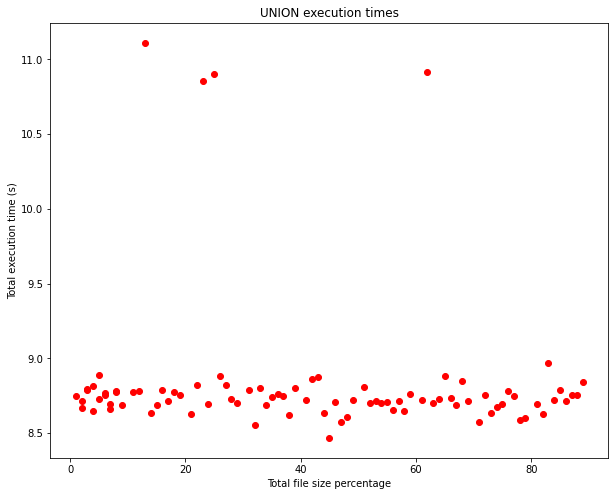

In [9]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = union_execution_times['Size percentage']
# corresponding y axis values
y = union_execution_times['Total app execution time (s)']
np_union = y.to_numpy()

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'red')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('UNION execution times')

# function to show the plot
plt.show()


----

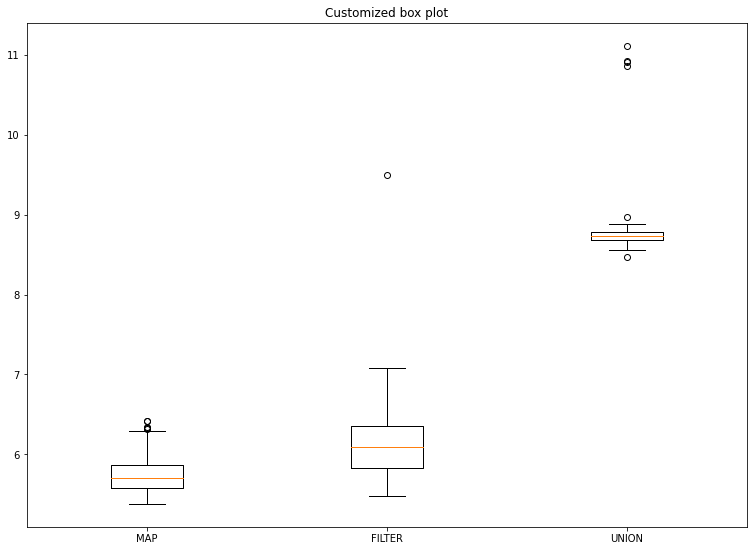

In [10]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data = [np_map, np_filter, np_union]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0,0,1,1])
 
# Creating plot
bp = ax.boxplot(data)

# x-axis labels
ax.set_xticklabels(['MAP', 'FILTER','UNION'])
 
# Adding title
plt.title("Customized box plot")
 
# show plot
plt.show()

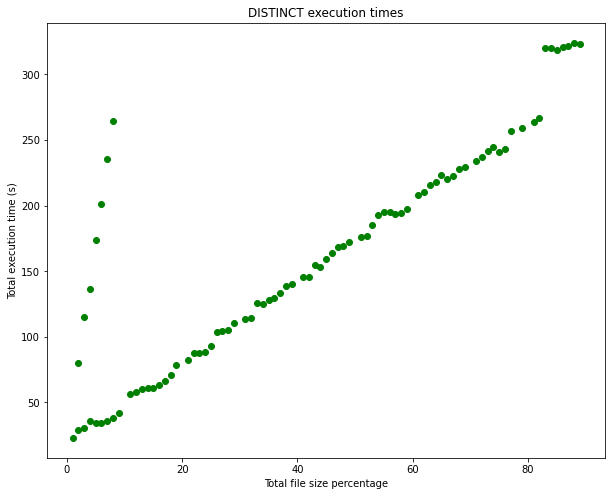

In [11]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = distinct_execution_times['Size percentage']
# corresponding y axis values
y = distinct_execution_times['Total app execution time (s)']
np_distinct = y.to_numpy()

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'green')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('DISTINCT execution times')

# function to show the plot
plt.show()

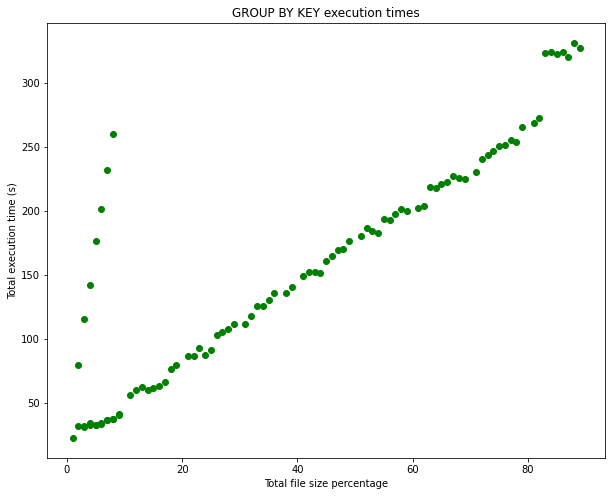

In [12]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = groupbykey_execution_times['Size percentage']
# corresponding y axis values
y = groupbykey_execution_times['Total app execution time (s)']
np_groupbykey = y.to_numpy()

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'green')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('GROUP BY KEY execution times')

# function to show the plot
plt.show()

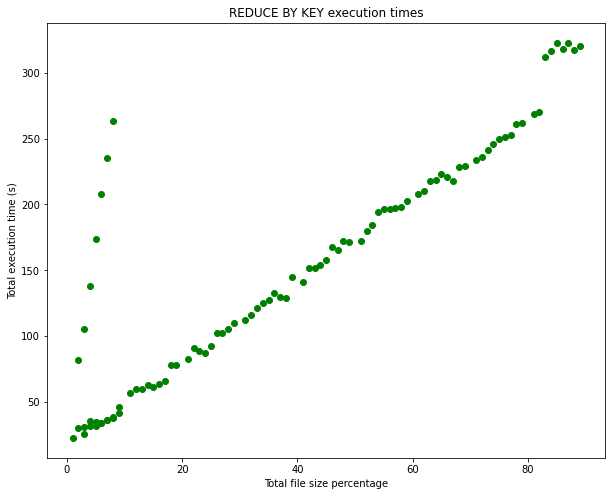

In [13]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = reducebykey_execution_times['Size percentage']
# corresponding y axis values
y = reducebykey_execution_times['Total app execution time (s)']
np_reducebykey = y.to_numpy()

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'green')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('REDUCE BY KEY execution times')

# function to show the plot
plt.show()

----------

In [34]:
df_sample = df.loc[df['App ID'] == 'app-20230804085544-0641']
df_sample.loc[df_sample['SHUFFLEW: Shuffle Bytes Written'] != '-']

,Unnamed: 0,App ID,App Name,User,Datetime,Name,Job ID,Total Stages,Stage ID,Total Tasks,...,SHUFFLER: Remote Blocks Fetched,SHUFFLER: Local Blocks Fetched,SHUFFLER: Fetch Wait Time,SHUFFLER: Remote Bytes Read,SHUFFLER: Remote Bytes Read To Disk,SHUFFLER: Local Bytes Read,SHUFFLER: Total Records Read,SHUFFLEW: Shuffle Bytes Written,SHUFFLEW: Shuffle Records Written,SHUFFLEW: Shuffle Write Time
22,22,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:05.141,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1722165,221,42
24,24,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:05.443,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1721776,244,52
26,27,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:05.746,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1715295,234,23
28,28,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:05.747,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1710348,252,17
29,31,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:05.821,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1718151,231,53
32,32,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:05.822,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1717185,233,32
33,34,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:07.701,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1714141,223,7
35,36,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:07.703,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1712670,248,52
38,38,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:09.092,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1713539,226,41
39,40,app-20230804085544-0641,groupByKey_app_narrow_transf_gsod_sample_009_1...,sargar19,2023-08-04 08:56:09.117,TASK END,0,2,0,28,...,0,0,"(0,)",0,0,0,0,1723485,238,7
